In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Данные

In [2]:
train_data = pd.read_csv('products_sentiment_train.tsv', sep='\t', header=None, names=['text', 'positive'])
train_data.head()

,text,positive
0,"2 . take around 10,000 640x480 pictures .",1
1,i downloaded a trial version of computer assoc...,1
2,the wrt54g plus the hga7t is a perfect solutio...,1
3,i dont especially like how music files are uns...,0
4,i was using the cheapie pail ... and it worked...,1


In [3]:
test_data = pd.read_csv('products_sentiment_test.tsv', sep='\t')
test_data.head()

,Id,text
0,0,"so , why the small digital elph , rather than ..."
1,1,3/4 way through the first disk we played on it...
2,2,better for the zen micro is outlook compatibil...
3,3,6 . play gameboy color games on it with goboy .
4,4,"likewise , i 've heard norton 2004 professiona..."


# Подбор параметров

In [4]:
vectorizer = CountVectorizer(ngram_range=(1, 2))
classifier = LogisticRegression(fit_intercept=False, penalty='l2')

estimator = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier),
])
cross_val_result = cross_val_score(
    estimator,
    train_data.text, train_data.positive, 
    cv=5, scoring='accuracy',
)

np.mean(cross_val_result)

0.7745

# Визуализация решения

In [5]:
vec_data = vectorizer.fit_transform(train_data.text)
vec_data_train, vec_data_test, y_train, y_test = train_test_split(vec_data, train_data.positive.values, test_size=0.3)

classifier.fit(vec_data_train, y_train)
predicted = classifier.predict(vec_data_test)

In [6]:
vec_data2_test = TSNE(n_components=2, perplexity=20, learning_rate='auto', init='random').fit_transform(vec_data_test)

In [7]:
pos_true_idx = (y_test == 1) & (y_test == predicted)
pos_false_idx = (y_test == 1) & (y_test != predicted)
neg_true_idx = (y_test == 0) & (y_test == predicted)
neg_false_idx = (y_test == 0) & (y_test != predicted)

vec_data2_pos_true = vec_data2_test[pos_true_idx]
vec_data2_pos_false = vec_data2_test[pos_false_idx]
vec_data2_neg_true = vec_data2_test[neg_true_idx]
vec_data2_neg_false = vec_data2_test[neg_false_idx]

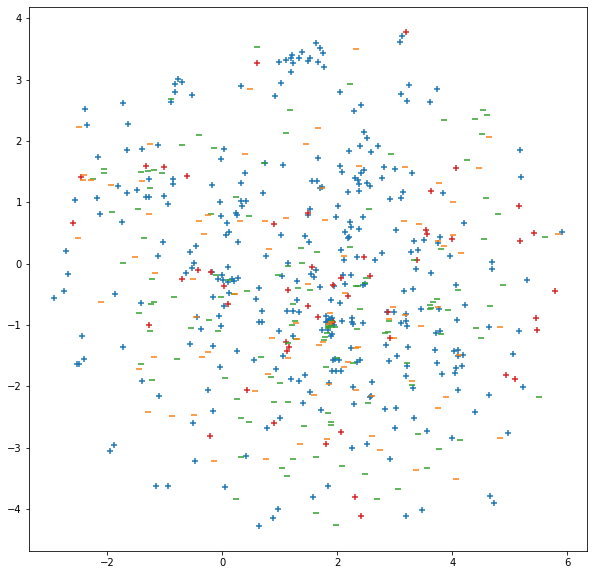

In [8]:
plt.figure(figsize=(10, 10))

plt.scatter(vec_data2_pos_true[:, 0], vec_data2_pos_true[:, 1], marker='+', color='tab:blue')
plt.scatter(vec_data2_pos_false[:, 0], vec_data2_pos_false[:, 1], marker='+', color='tab:red')

plt.scatter(vec_data2_neg_true[:, 0], vec_data2_neg_true[:, 1], marker='_', color='tab:green')
plt.scatter(vec_data2_neg_false[:, 0], vec_data2_neg_false[:, 1], marker='_', color='tab:orange')

# Обучение

In [9]:
estimator.fit(train_data.text, train_data.positive)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('classifier', LogisticRegression(fit_intercept=False))])

# Оценка тестовой выборки

In [10]:
test_data['y'] = estimator.predict(test_data.text)
test_data

,Id,text,y
0,0,"so , why the small digital elph , rather than ...",1
1,1,3/4 way through the first disk we played on it...,0
2,2,better for the zen micro is outlook compatibil...,1
3,3,6 . play gameboy color games on it with goboy .,1
4,4,"likewise , i 've heard norton 2004 professiona...",0
...,...,...,...
495,495,i took perfect care of this player and still i...,0
496,496,it 's a very intuitive program .,1
497,497,the only drawback is the viewfinder is slightl...,0
498,498,"it films 10 second video , for crying out loud .",0


In [12]:
test_data.to_csv('my_result.basic.csv', columns=['Id', 'y'], index=False)